## Demo xarray/dask with MOM6

In [1]:
import xarray as xr
from xgcm import Grid
import warnings
import matplotlib.pylab as plt
from cartopy import crs as ccrs
import numpy as np

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

## Loading dataset

In [3]:
dataurl = '/Users/raphael/STORAGE'

ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
                     chunks={'time':1, 'z_l': 35}, drop_variables=['average_DT',
                                                                  'average_T1',
                                                                  'average_T2'])

Size of chunks matters a great deal! too big it doesn't fit into memory, too small and it will slow you down.

In [4]:
# and you can try this at home (dask cluster won't work though)

#dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/'
#ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
#                     chunks={'time':1, 'z_l': 35}, drop_variables=['average_DT',
#                                                                   'average_T1',
#                                                                   'average_T2'],
#                     engine='pydap')

In [5]:
ds

<xarray.Dataset>
Dimensions:       (nv: 2, time: 60, xh: 720, xq: 720, yh: 576, yq: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * xh            (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq            (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 59.0 59.5 60.0
  * yh            (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq            (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * z_i           (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l           (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * time          (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
Data variables:
    Coriolis      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello     (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_bu  (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cu  (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cv  (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    deptho        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    hfgeou        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    sftof         (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    thkcello      (z_l, yh, xh) float32 dask.array<chunksize=(35, 576, 720), meta=np.ndarray>
    wet           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_c         (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_u         (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_v         (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    so            (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    time_bnds     (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetao        (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    umo           (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    uo            (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    vmo           (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    vo            (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    volcello      (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    zos           (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly.200301-200

## Broadcasting rules (and an example of what you should not do)

In [6]:
bad_idea = ds['umo'] * ds['thetao']

In [7]:
bad_idea

,Array,Chunk
Bytes,2.51 TB,41.80 GB
Shape,"(60, 35, 576, 720, 720)","(1, 35, 576, 720, 720)"
Count,422 Tasks,60 Chunks
Type,float32,numpy.ndarray


## Interpolate T/S on V-point (using xgcm)

In [8]:
grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])

In [9]:
ds['thetao_u'] = grid.interp(ds['thetao'], 'X', boundary='fill')
ds['so_u'] = grid.interp(ds['so'], 'X', boundary='fill')

#ds['thetao_v'] = grid.interp(ds['thetao'], 'Y', boundary='fill')
#ds['so_v'] = grid.interp(ds['so'], 'Y', boundary='fill')

In [10]:
ds['thetao_u']

,Array,Chunk
Bytes,3.48 GB,57.98 MB
Shape,"(60, 35, 576, 720)","(1, 35, 576, 719)"
Count,901 Tasks,120 Chunks
Type,float32,numpy.ndarray


## Compute potential density (custom function applied lazily)

In [11]:
# function for potential density with Wright EOS
def pdens(S,theta):

    # --- Define constants (Table 1 Column 4, Wright 1997, J. Ocean Tech.)---
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    # To compute potential density keep pressure p = 100 kpa
    # S in standard salinity units psu, theta in DegC, p in pascals

    p = 100000.
    alpha0 = a0 + a1*theta + a2*S
    p0 = b0 + b1*theta + b2*theta**2 + b3*theta**3 + b4*S + b5*theta*S
    lambd = c0 + c1*theta + c2*theta**2 + c3*theta**3 + c4*S + c5*theta*S

    pot_dens = (p + p0)/(lambd + alpha0*(p + p0))

    return pot_dens

### what you should not do:

In [12]:
bad_idea = pdens(ds.so_u, ds.thetao_u)

In [13]:
bad_idea

,Array,Chunk
Bytes,3.48 GB,57.98 MB
Shape,"(60, 35, 576, 720)","(1, 35, 576, 719)"
Count,5642 Tasks,120 Chunks
Type,float32,numpy.ndarray


### but rather do:

In [14]:
ds['sigmao_u'] = xr.apply_ufunc(pdens, ds.so_u, ds.thetao_u,
                                dask='parallelized',
                                output_dtypes=[ds.so_u.dtype])

In [15]:
ds['sigmao_u']

,Array,Chunk
Bytes,3.48 GB,57.98 MB
Shape,"(60, 35, 576, 720)","(1, 35, 576, 719)"
Count,1922 Tasks,120 Chunks
Type,float32,numpy.ndarray


## Select region of interest

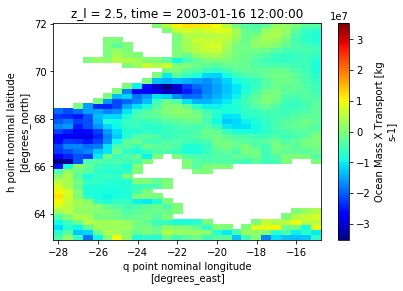

In [16]:
ds['umo'].sel(xq=slice(-28,-15), yh=slice(63,72), z_l=2.5, time='2003-01').plot(cmap='jet')

In [17]:
section = ds.sel(xq=-23.5, yh=slice(66,70))

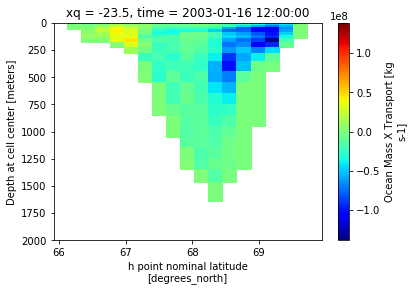

In [18]:
section['umo'].sel(time='2003-01').plot(yincrease=False, ylim=[2000,0], cmap='jet')

## A test (and inacurrate) diagnostic

In [19]:
densewater_transport = section['umo'].where(section['sigmao_u'] > 1027.8).sum(dim=['z_l', 'yh'])

In [20]:
densewater_transport

<xarray.DataArray 'umo' (time: 60)>
dask.array<sum-aggregate, shape=(60,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    xq       float64 -23.5
  * time     (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00

## Get results faster with a dask cluster

In [21]:
from dask.distributed import Client, LocalCluster

In [22]:
# create the cluster
my_local_machine = LocalCluster()

In [23]:
# connect client to cluster
my_dask_client = Client(my_local_machine)

In [24]:
my_dask_client

Client Scheduler: tcp://127.0.0.1:51970 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.18 GB


CPU times: user 8.3 s, sys: 1.32 s, total: 9.62 s
Wall time: 47.2 s


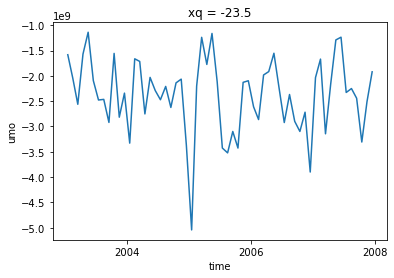

In [25]:
%time densewater_transport.plot()

Let's talk chunking: The total size of one variable in memory is 60 * 35 * 576 * 720 * 4 / 1024 / 1024 = 3322 Mo.
See how the performance change according to chunk size:

time | depth | bytes per chunk | runtime
--- | --- | --- | ----
12 | 35 | 664 Mo |15'30"
2 | 1 | 110 Mo | 51"
1 | 35 | 55 Mo | 30"
1 | 10 | 15 Mo | 35"
1 | 1 | 1 Mo | 2'30"